In [30]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2 as cv
import cv2
from tensorflow import keras
import tensorflow.keras.layers as layers

In [3]:
import datetime

## Step 1: Pre-process and create train set

In [4]:
def show_img(img):
    cv2.imshow("Image", img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

In [ ]:
# Load the TensorBoard notebook extension
%load_ext tensorboard

In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('Dataset\monument_hog',
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 114 images belonging to 5 classes.


## Step 2: pre-process and create test set

In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = train_datagen.flow_from_directory('Dataset/Indian-monuments/hog_test',
                                                 target_size = (128,128),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1058 images belonging to 24 classes.


## Step 3: Import the pre- trained model 

In [185]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (128, 128, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False

## Step 4: Add Flattening, hidden and output layers

In [186]:
x=base_model.output
x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dense(24, activation='sigmoid')(x)

inception = tf.keras.models.Model(base_model.input, x)
inception.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [187]:
inception.summary()

Model: "model_10"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_188 (Conv2D)            (None, 63, 63, 32)   864         ['input_5[0][0]']                
                                                                                                  
 batch_normalization_188 (Batch  (None, 63, 63, 32)  96          ['conv2d_188[0][0]']             
 Normalization)                                                                                   
                                                                                           

 batch_normalization_198 (Batch  (None, 13, 13, 96)  288         ['conv2d_198[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_199 (Batch  (None, 13, 13, 32)  96          ['conv2d_199[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_193 (Activation)    (None, 13, 13, 64)   0           ['batch_normalization_193[0][0]']
                                                                                                  
 activation_195 (Activation)    (None, 13, 13, 64)   0           ['batch_normalization_195[0][0]']
                                                                                                  
 activatio

 conv2d_208 (Conv2D)            (None, 13, 13, 48)   13824       ['mixed1[0][0]']                 
                                                                                                  
 conv2d_211 (Conv2D)            (None, 13, 13, 96)   55296       ['activation_210[0][0]']         
                                                                                                  
 batch_normalization_208 (Batch  (None, 13, 13, 48)  144         ['conv2d_208[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_211 (Batch  (None, 13, 13, 96)  288         ['conv2d_211[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                  'max_pooling2d_10[0][0]']       
                                                                                                  
 conv2d_222 (Conv2D)            (None, 6, 6, 128)    98304       ['mixed3[0][0]']                 
                                                                                                  
 batch_normalization_222 (Batch  (None, 6, 6, 128)   384         ['conv2d_222[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_222 (Activation)    (None, 6, 6, 128)    0           ['batch_normalization_222[0][0]']
                                                                                                  
 conv2d_223 (Conv2D)            (None, 6, 6, 128)    114688      ['activation_222[0][0]']         
          

 Normalization)                                                                                   
                                                                                                  
 activation_232 (Activation)    (None, 6, 6, 160)    0           ['batch_normalization_232[0][0]']
                                                                                                  
 conv2d_233 (Conv2D)            (None, 6, 6, 160)    179200      ['activation_232[0][0]']         
                                                                                                  
 batch_normalization_233 (Batch  (None, 6, 6, 160)   480         ['conv2d_233[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_233 (Activation)    (None, 6, 6, 160)    0           ['batch_normalization_233[0][0]']
          

                                                                                                  
 batch_normalization_243 (Batch  (None, 6, 6, 160)   480         ['conv2d_243[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_243 (Activation)    (None, 6, 6, 160)    0           ['batch_normalization_243[0][0]']
                                                                                                  
 conv2d_239 (Conv2D)            (None, 6, 6, 160)    122880      ['mixed5[0][0]']                 
                                                                                                  
 conv2d_244 (Conv2D)            (None, 6, 6, 160)    179200      ['activation_243[0][0]']         
                                                                                                  
 batch_nor

                                                                                                  
 conv2d_249 (Conv2D)            (None, 6, 6, 192)    147456      ['mixed6[0][0]']                 
                                                                                                  
 conv2d_254 (Conv2D)            (None, 6, 6, 192)    258048      ['activation_253[0][0]']         
                                                                                                  
 batch_normalization_249 (Batch  (None, 6, 6, 192)   576         ['conv2d_249[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_254 (Batch  (None, 6, 6, 192)   576         ['conv2d_254[0][0]']             
 Normalization)                                                                                   
          

 batch_normalization_258 (Batch  (None, 6, 6, 192)   576         ['conv2d_258[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 batch_normalization_262 (Batch  (None, 6, 6, 192)   576         ['conv2d_262[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_258 (Activation)    (None, 6, 6, 192)    0           ['batch_normalization_258[0][0]']
                                                                                                  
 activation_262 (Activation)    (None, 6, 6, 192)    0           ['batch_normalization_262[0][0]']
                                                                                                  
 conv2d_25

                                                                                                  
 activation_267 (Activation)    (None, 2, 2, 384)    0           ['batch_normalization_267[0][0]']
                                                                                                  
 activation_270 (Activation)    (None, 2, 2, 384)    0           ['batch_normalization_270[0][0]']
                                                                                                  
 activation_271 (Activation)    (None, 2, 2, 384)    0           ['batch_normalization_271[0][0]']
                                                                                                  
 batch_normalization_272 (Batch  (None, 2, 2, 192)   576         ['conv2d_272[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activatio

                                                                                                  
 batch_normalization_281 (Batch  (None, 2, 2, 192)   576         ['conv2d_281[0][0]']             
 Normalization)                                                                                   
                                                                                                  
 activation_273 (Activation)    (None, 2, 2, 320)    0           ['batch_normalization_273[0][0]']
                                                                                                  
 mixed9_1 (Concatenate)         (None, 2, 2, 768)    0           ['activation_275[0][0]',         
                                                                  'activation_276[0][0]']         
                                                                                                  
 concatenate_5 (Concatenate)    (None, 2, 2, 768)    0           ['activation_279[0][0]',         
          

## Step 5: Train the model

In [188]:
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [189]:
checkpoint = keras.callbacks.ModelCheckpoint("dataset_monument_classification_inception_hog",monitor="val_accuracy",mode='max',save_best_only=True)

In [190]:
Inception_hist=inception.fit(training_set,validation_data = test_set,epochs=10, callbacks=[checkpoint])

Epoch 1/10
115/115 [==============================] - ETA: 0s - loss: 3.1444 - accuracy: 0.4257

INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


115/115 [==============================] - 49s 400ms/step - loss: 3.1444 - accuracy: 0.4257 - val_loss: 3.3350 - val_accuracy: 0.3308
Epoch 2/10
115/115 [==============================] - ETA: 0s - loss: 1.2881 - accuracy: 0.6368

INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


115/115 [==============================] - 43s 378ms/step - loss: 1.2881 - accuracy: 0.6368 - val_loss: 3.7218 - val_accuracy: 0.3724
Epoch 3/10
115/115 [==============================] - 21s 177ms/step - loss: 1.0523 - accuracy: 0.6868 - val_loss: 3.6761 - val_accuracy: 0.3629
Epoch 4/10
115/115 [==============================] - ETA: 0s - loss: 0.9447 - accuracy: 0.7185

INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


115/115 [==============================] - 41s 356ms/step - loss: 0.9447 - accuracy: 0.7185 - val_loss: 3.7622 - val_accuracy: 0.3894
Epoch 5/10
115/115 [==============================] - ETA: 0s - loss: 0.8462 - accuracy: 0.7452

INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


115/115 [==============================] - 42s 364ms/step - loss: 0.8462 - accuracy: 0.7452 - val_loss: 3.8953 - val_accuracy: 0.4187
Epoch 6/10
115/115 [==============================] - ETA: 0s - loss: 0.7845 - accuracy: 0.7578

INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


115/115 [==============================] - 44s 381ms/step - loss: 0.7845 - accuracy: 0.7578 - val_loss: 3.9955 - val_accuracy: 0.4206
Epoch 7/10
115/115 [==============================] - ETA: 0s - loss: 0.7089 - accuracy: 0.7870

INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


115/115 [==============================] - 45s 393ms/step - loss: 0.7089 - accuracy: 0.7870 - val_loss: 3.9771 - val_accuracy: 0.4216
Epoch 8/10
115/115 [==============================] - ETA: 0s - loss: 0.7034 - accuracy: 0.7848

INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


INFO:tensorflow:Assets written to: dataset_monument_classification_inception_hog\assets


115/115 [==============================] - 45s 389ms/step - loss: 0.7034 - accuracy: 0.7848 - val_loss: 4.0980 - val_accuracy: 0.4329
Epoch 9/10
115/115 [==============================] - 22s 191ms/step - loss: 0.6146 - accuracy: 0.8099 - val_loss: 4.3037 - val_accuracy: 0.4178
Epoch 10/10
115/115 [==============================] - 21s 183ms/step - loss: 0.5453 - accuracy: 0.8334 - val_loss: 4.8432 - val_accuracy: 0.4253


## Step 6: Train and Test accuracy, loss plots

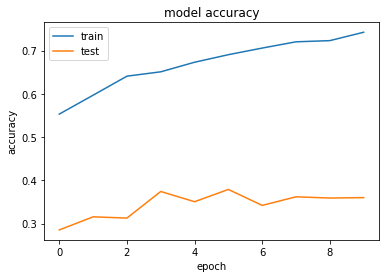

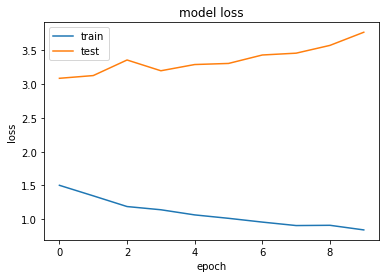

In [177]:
# summarize history for accuracy
plt.plot(Inception_hist.history['accuracy'])
plt.plot(Inception_hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(Inception_hist.history['loss'])
plt.plot(Inception_hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [178]:
inception.save('saved_model/monument_classify_vgg16_hog')

INFO:tensorflow:Assets written to: saved_model/monument_classify_vgg16_hog\assets


INFO:tensorflow:Assets written to: saved_model/monument_classify_vgg16_hog\assets


## Prediction

In [21]:
class_names = list(training_set.class_indices.keys())
print(class_names)

['Colonial', 'Dravidian', 'Indo-Saracenic', 'Kalinga', 'Mughal']


In [31]:
def get_hog(input_img):
    img= np.float32(input_img) / 255.0

    gx = cv.Sobel(img, cv.CV_32F, 1, 0, ksize=1)
    gy = cv.Sobel(img, cv.CV_32F, 0, 1, ksize=1)

    mag, angle = cv.cartToPolar(gx, gy, angleInDegrees=True)
    mag = cv.resize(mag,(128,128))
    img_output = mag * 255.0
    img_output = img_output.astype('uint8')
    return img_output

In [41]:

img = tf.keras.utils.load_img(
    'dataset/monument_hog/Colonial/Image_5 (3).jpg', target_size=(128, 128)
)

img = cv.imread("Dataset/Indian-monuments/images/test/Gateway of India/141.jpg")
img = get_hog(img)
cv.imshow("image",img)
cv.waitKey(0)
cv.destroyAllWindows()
img_array = tf.expand_dims(img, 0) # Create a batch

predictions =  new_model.predict(img_array)
score = tf.nn.softmax(predictions[0])
output = class_names[np.argmax(score)]
print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

1/1 [==============================] - 0s 15ms/step
This image most likely belongs to Indo-Saracenic with a 31.95 percent confidence.


## Similar finder

In [42]:
def filter_match(matches):
    good_points = []
    ratio = 0.6
    for m, n in matches:
        if m.distance < ratio*n.distance:
            good_points.append(m)
    return good_points

In [43]:
def percentage(img,img_2):
    sift = cv2.xfeatures2d.SIFT_create()
    kp_1, desc_1 = sift.detectAndCompute(img, None)
    kp_2, desc_2 = sift.detectAndCompute(img_2, None)
    number_keypoints = 0
    if len(kp_1) <= len(kp_2):
        number_keypoints = len(kp_1)
    else:
        number_keypoints = len(kp_2)
    #print("Keypoints 1ST Image: " + str(len(kp_1)))
    #print("Keypoints 2ND Image: " + str(len(kp_2)))
    index_params = dict(algorithm=0, trees=5)
    search_params = dict()
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(desc_1, desc_2, k=2)
    good_points=filter_match(matches)
    percent=len(good_points) / number_keypoints * 100
    return percent
    #result = cv2.drawMatches(img, kp_1, img_2, kp_2, good_points, None)

In [ ]:
# output = "Colonial"

In [49]:
f = "dataset\\dynasty"
perc=dict()

for cats in os.listdir(f):
    if cats==output:
        continue
    path=f+"\\"+cats
    for imgs in os.listdir(path):
        f_img= path+"\\"+imgs
        img_2=cv2.imread(f_img,0)
        #print(f_img)
        p=percentage(img,img_2)
        perc[p]=f_img
        #plt.imshow(img_2)
print(perc)
sorted_perc = sorted(perc.items(), key=lambda x:x[0],reverse=True)

{0.23103581055063535: 'dataset\\dynasty\\Colonial\\Image_1 (2).jpg', 0.0: 'dataset\\dynasty\\Kalinga\\Image_5 (6).jpg', 0.05081946385465633: 'dataset\\dynasty\\Colonial\\Image_1 (7).jpg', 0.058479532163742694: 'dataset\\dynasty\\Colonial\\Image_1.jpg', 0.12417218543046359: 'dataset\\dynasty\\Colonial\\Image_1.png', 0.07592190889370933: 'dataset\\dynasty\\Colonial\\Image_2 (2).JPG', 0.30845157310302285: 'dataset\\dynasty\\Colonial\\Image_2 (4).jpg', 0.528169014084507: 'dataset\\dynasty\\Colonial\\Image_2 (6).jpg', 0.0864902266043937: 'dataset\\dynasty\\Colonial\\Image_2 (7).jpg', 0.12816404998397948: 'dataset\\dynasty\\Colonial\\Image_3 (2).jpg', 4.6966731898238745: 'dataset\\dynasty\\Colonial\\Image_3 (4).jpg', 0.07614696363982486: 'dataset\\dynasty\\Colonial\\Image_4 (2).jpg', 0.4257907542579075: 'dataset\\dynasty\\Colonial\\Image_4 (3).jpg', 0.1224739742804654: 'dataset\\dynasty\\Colonial\\Image_4 (4).jpg', 0.9615384615384616: 'dataset\\dynasty\\Colonial\\Image_4 (6).jpg', 0.01254075

In [51]:
#print(sorted_perc)
n=3
count=0
# img=cv2.imread(r"dataset\dynasty\Mughal\Image_1 (2).jpg")
# show_img(img)
for tup in sorted_perc:
    if count==n:
        break
    #plt.imshow(tup[1])
    print(tup[0])
    img=cv2.imread(tup[1])
    show_img(img)
    count=count+1

97.79289026275116
15.310077519379844
4.6966731898238745


## Load model from checkpoint

In [16]:
from tensorflow.keras.applications.vgg16 import VGG16
base_model = VGG16(input_shape = (128, 128, 3), include_top = False, weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False


In [17]:
x=base_model.output
x = layers.GlobalAveragePooling2D(name='avg_pool')(x)
x = layers.Dense(2048, activation='relu')(x)
x = layers.Dense(6, activation='sigmoid')(x)

model  = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [204]:
model.load_weights("dataset_monument_classification_inception_hog")

In [18]:
new_model = tf.keras.models.load_model('saved_model/dynasty_hog_noncave_vgg16_model')

In [19]:
new_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 128, 128, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0   